In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_ccfrag_scores = pd.read_csv('../MYOSIN/CCfrag_constructs_MYOSIN/MYOSIN/DATA_CCfrag.csv', index_col=0)

In [3]:
list_specifications = ['2_20_10',
                      '2_30_15',
                      '2_50_25',
                      '2_70_35',]

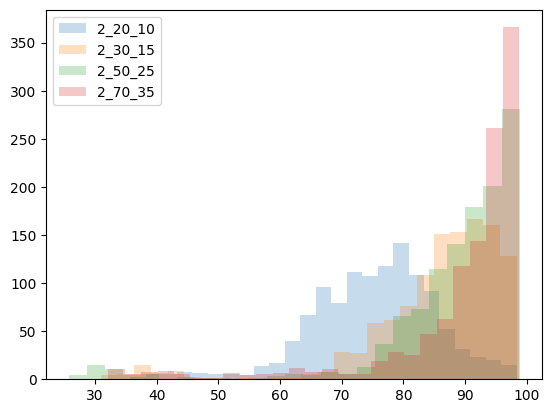

In [4]:
list_scores = []

# select the CC domain
target_df = df_ccfrag_scores[df_ccfrag_scores['residue_number'] > 800]

for specification in list_specifications:
    scores = target_df[f'{specification}_plddt']
    list_scores.append(scores)
    plt.hist(scores, alpha=0.25, bins=25, label=specification)
plt.legend()

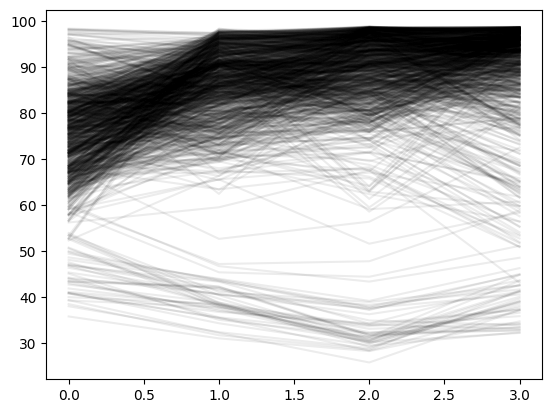

In [5]:
plt.plot(list_scores, color='black', alpha=0.075)
None

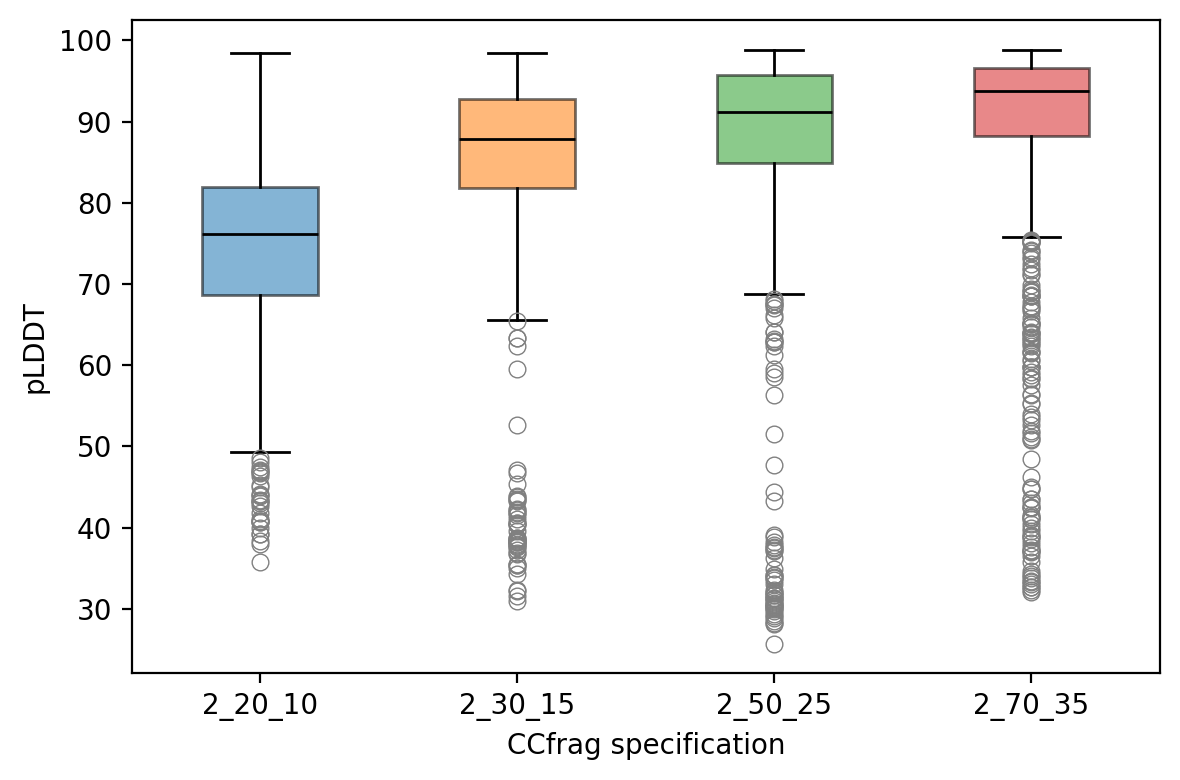

In [6]:
colors = [f'C{i}' for i in range(4)]
median_color='black'

outlier_color='gray'
outlier_alpha=1

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
box = ax.boxplot(np.array(list_scores).T, patch_artist=True,
                flierprops=dict(marker='o', markeredgecolor=outlier_color, alpha=outlier_alpha, markersize=6,markeredgewidth=0.5))

# change the color of the boxes to match the other plots
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.55)

# Change the color of the median lines
for median in box['medians']:
    median.set_color(median_color)
    median.set_linewidth(1)  # Optionally, adjust the line width

ax.set_ylabel('pLDDT')
ax.set_xlabel('CCfrag specification')
ax.set_xticks(ticks=range(1,5), labels=list_specifications)
plt.tight_layout()
plt.show()

In [7]:
from pathlib import Path
path_full_length_model = Path('./full_length_AF_models/MYOSIN_801-1979_CC_stalk_unrelaxed_rank_001_alphafold2_multimer_v3_model_1_seed_000.pdb')

In [8]:
def extract_per_residue_plddt(path_model):
    data_plddt = []

    with open(path_full_length_model, 'r') as inpt:
        for line in inpt:
            if line.startswith('ATOM') and 'CA' in line:
                data_pdb = line.strip()
                raw_resi = data_pdb[22:31]
                resi = int(raw_resi.strip())
                
                raw_beta = data_pdb[60:66]
                plddt = float(raw_beta.strip())
    
                data_plddt.append((resi, plddt))
    
    df_plddt = pd.DataFrame(data_plddt, columns=['resi', 'plddt'])
    df_pr_plddt = df_plddt.groupby('resi')['plddt'].mean()
    return df_pr_plddt

In [9]:
df_pr_plddt = extract_per_residue_plddt(path_full_length_model)
df_pr_plddt

resi
1       44.375
2       46.545
3       44.095
4       46.565
5       46.095
         ...  
1175    17.910
1176    16.770
1177    21.325
1178    17.355
1179    20.305
Name: plddt, Length: 1179, dtype: float64

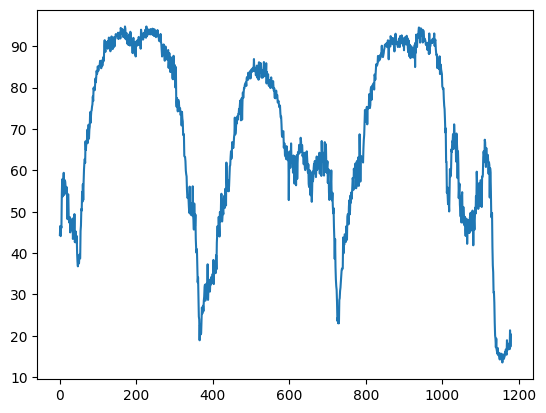

In [10]:
plt.plot(df_pr_plddt)

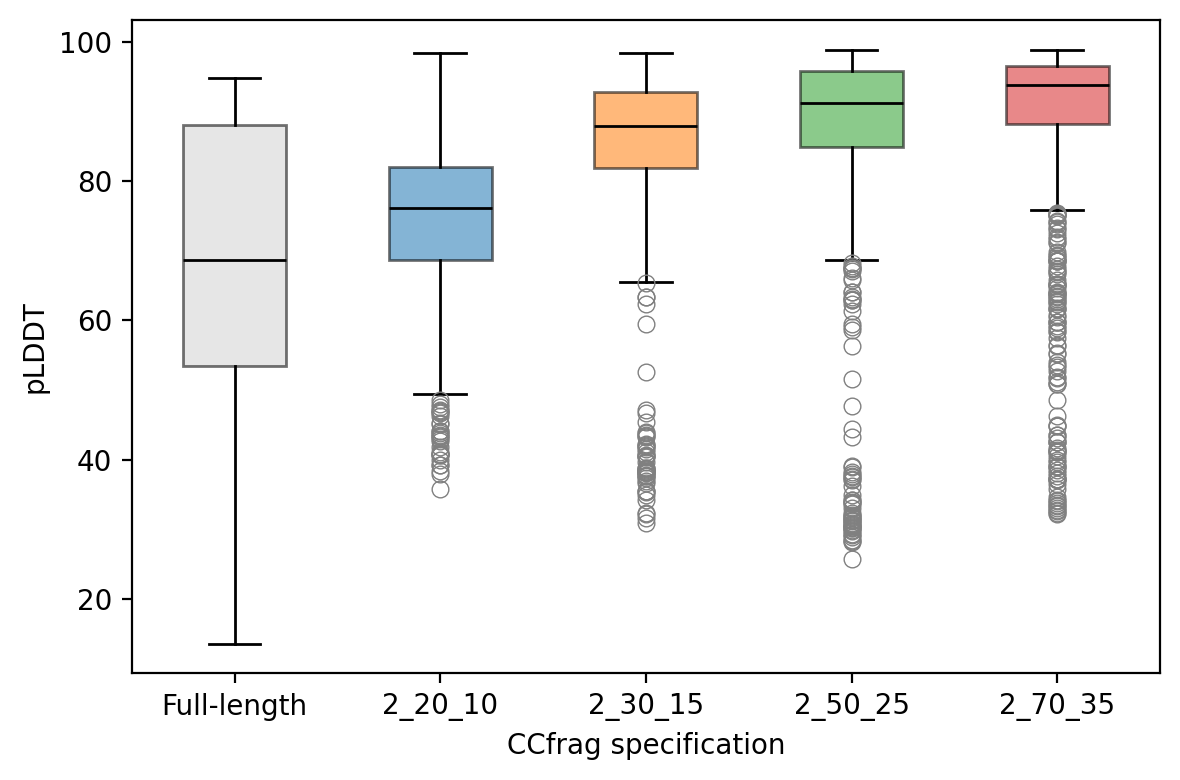

In [11]:
colors = [f'C{i}' for i in range(4)]
median_color='black'

outlier_color='gray'
outlier_alpha=1

all_data = [df_pr_plddt.to_list()] + list_scores
all_colors = ['lightgray'] + colors

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
box = ax.boxplot(all_data, patch_artist=True, positions=range(0,5),
                flierprops=dict(marker='o', markeredgecolor=outlier_color, alpha=outlier_alpha, markersize=6,markeredgewidth=0.5))

# change the color of the boxes to match the other plots
for patch, color in zip(box['boxes'], all_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.55)

# Change the color of the median lines
for median in box['medians']:
    median.set_color(median_color)
    median.set_linewidth(1)  # Optionally, adjust the line width

ax.set_ylabel('pLDDT')
ax.set_xlabel('CCfrag specification')
ax.set_xticks(ticks=range(0, 5), labels=['Full-length'] + list_specifications)
plt.tight_layout()
plt.show()